In [1]:
import numpy as np
import os
import random
import torch

from torch.utils.data import DataLoader, random_split

from Callbacks import EarlyStopping
from TransferLearningModel import TransferLearningModel
from utils import DICOMCoarseDataset, TransformDataset, TensorFolderDataset, find_overlapping_images

In [ ]:
# Definition of the Scenario, if Data Augmentaion is applied and the folder to store the weights
scenario = 1
data_augmentation = True
save_folder_base = f"./data/scenario{scenario}/"

In [ ]:
# Definition of the data folder and the initially set variables
BASE_DIR = "C:/Users/Dominik Hahn/OneDrive/Studium/Master/Masterarbeit/Daten"
# BASE_DIR = "C:/Users/domin/OneDrive/Studium/Master/Masterarbeit/Daten"
seed = 41
batch_size = 32
classes = ["nodule", "non-nodule"]
train_ratio = 0.6

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

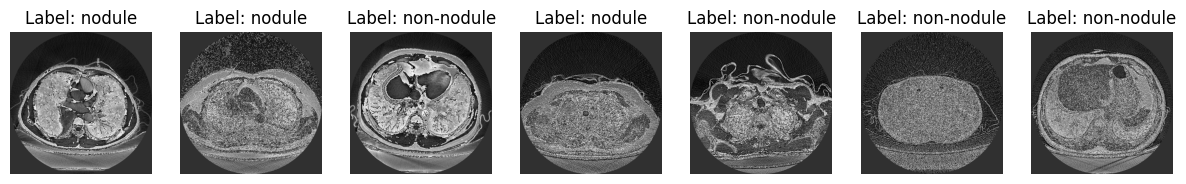

In [ ]:
# Visualization of different CT images from the dataset with their corresponding labels
dataset = DICOMCoarseDataset(root_dir=BASE_DIR, num_images_per_class=len(os.listdir(os.path.join(BASE_DIR, "nodule"))), classes=classes, scenario=scenario)
# dataset = DICOMCoarseDataset(root_dir=BASE_DIR, num_images_per_class=10, classes=classes, scenario=scenario)
dataset.visualize_images(num_images=7)

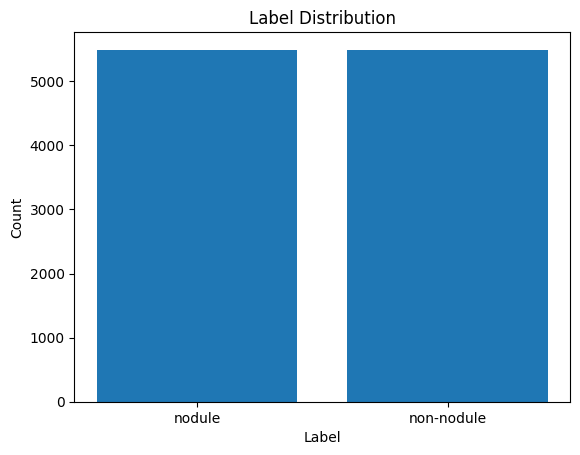

In [ ]:
# Visualization of the Label Distribution within the dataset
dataset.display_label_distribution()

In [ ]:
# Calculation of the Train, Validation and Test Size
train_size = int(train_ratio * len(dataset))
val_size = int(((1-train_ratio)/2) * len(dataset)) 
test_size = len(dataset) - train_size - val_size

print(f"Train size: {train_size} --- Validation size: {val_size} --- Test size: {test_size}")

Train size: 6591 --- Validation size: 2197 --- Test size: 2198


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9004807..2.4711628].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9458059..2.2796998].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.960821..2.232609].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.061605..2.148662].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.972094..2.1527517].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8452158..1.4324414].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7920175..1.

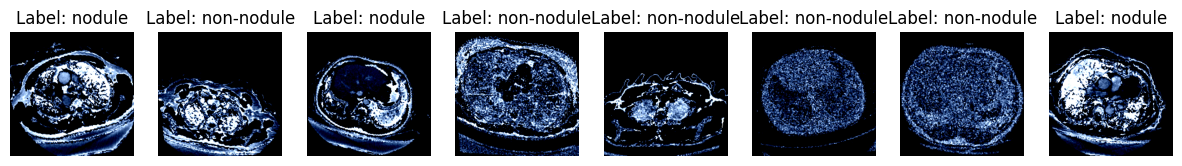

In [ ]:
# Visualization of CT images of the Dataset with the application of random data augmentation techniques
from utils import display_data_loader_batch
display_model = TransferLearningModel(classes, "unet", data_augmentation=True, fine=False, scenario=1)
display_model.train_transforms, display_model.test_transforms = display_model.get_transforms()
train_indices, val_indices, test_indices = random_split(dataset, [train_size, val_size, test_size])
train_dataset = TransformDataset(torch.utils.data.Subset(dataset, train_indices.indices), transform=display_model.train_transforms)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
display_data_loader_batch(train_loader, classes)

In [ ]:
# Check for overlapping images in the different dataset splits (the shown duplicates were manually checked and found as no duplicates)
train_dataset_base = TensorFolderDataset(os.path.join(save_folder_base, "train"))
val_dataset_base = TensorFolderDataset(os.path.join(save_folder_base, "val"))
test_dataset_base = TensorFolderDataset(os.path.join(save_folder_base, "test"))

find_overlapping_images(train_dataset_base, test_dataset_base)
find_overlapping_images(val_dataset_base, test_dataset_base)

c:\Users\Dominik Hahn\Documents\GitHub\Masterarbeit\Final Models\utils.py:551: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file_path)


Found 8 overlapping images
Train index: 1764, Test index: 88
Train index: 5385, Test index: 157
Train index: 4877, Test index: 420
Train index: 4190, Test index: 448
Train index: 4604, Test index: 670
Train index: 2272, Test index: 1372
Train index: 714, Test index: 1456
Train index: 5740, Test index: 1457
Found 2 overlapping images
Train index: 1279, Test index: 1071
Train index: 1684, Test index: 1252


[1071, 1252]

Epoch 1/50 ----- Loss: 0.6929, Accuracy: 50.89% ----- Validation Loss: 0.6930, Validation Accuracy: 48.66%
Epoch 2/50 ----- Loss: 0.6925, Accuracy: 50.87% ----- Validation Loss: 0.6924, Validation Accuracy: 50.02%
Epoch 3/50 ----- Loss: 0.6920, Accuracy: 52.89% ----- Validation Loss: 0.6924, Validation Accuracy: 48.66%
Epoch 4/50 ----- Loss: 0.6916, Accuracy: 52.16% ----- Validation Loss: 0.6922, Validation Accuracy: 48.66%
Epoch 5/50 ----- Loss: 0.6913, Accuracy: 53.36% ----- Validation Loss: 0.6917, Validation Accuracy: 48.84%
Epoch 6/50 ----- Loss: 0.6908, Accuracy: 53.06% ----- Validation Loss: 0.6913, Validation Accuracy: 50.20%
Epoch 7/50 ----- Loss: 0.6904, Accuracy: 54.06% ----- Validation Loss: 0.6909, Validation Accuracy: 50.71%
Epoch 8/50 ----- Loss: 0.6901, Accuracy: 53.51% ----- Validation Loss: 0.6902, Validation Accuracy: 55.80%
Epoch 9/50 ----- Loss: 0.6896, Accuracy: 56.88% ----- Validation Loss: 0.6900, Validation Accuracy: 54.21%
Epoch 10/50 ----- Loss: 0.6892, Accur

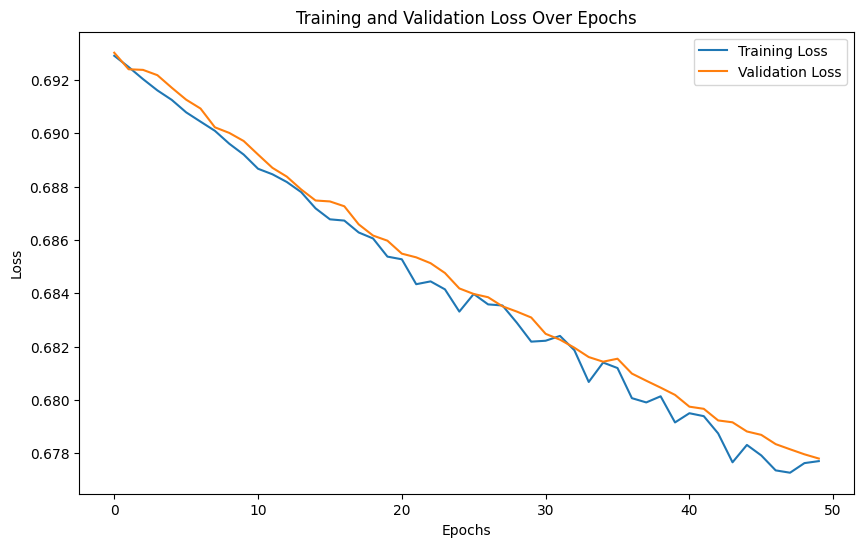

In [ ]:
# Execute the Training Phase for the U-Net classification model
model = TransferLearningModel(classes, "unet", data_augmentation=data_augmentation, fine=False, scenario=scenario)

# Ensure transforms are correctly applied based on model requirements
model.train_transforms, model.test_transforms = model.get_transforms()
# Apply specific transforms to each subset
train_dataset = TransformDataset(train_dataset_base, transform=model.train_transforms)
val_dataset = TransformDataset(val_dataset_base, transform=model.test_transforms)
test_dataset = TransformDataset(test_dataset_base, transform=model.test_transforms)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize early stopping
early_stopping = EarlyStopping(patience=10)

# Train the current model
model.train(train_loader, val_loader, early_stopping, epochs=50)

Evaluation Accuracy on unseen data: 62.357760582612656


<Figure size 1000x800 with 0 Axes>

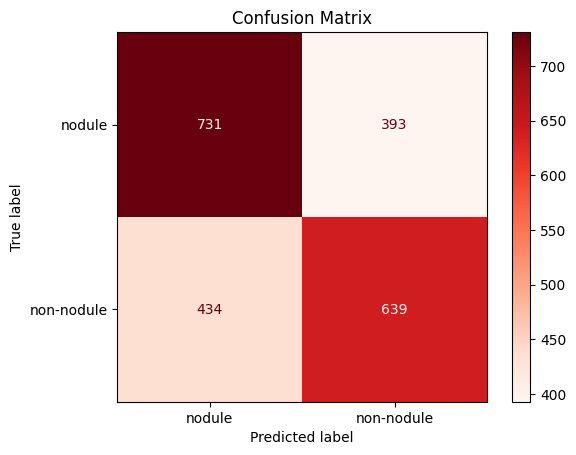

In [ ]:
# Execute the evaluation process of the U-Net model
model.evaluate(test_loader)